<a href="https://colab.research.google.com/github/MaiCongTuanKiet/Artificial-Intelligence/blob/main/10MONAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import thư viện 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [127]:
#importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, load_img, img_to_array

#Preprocessing để Training 
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh và định dạng ảnh về binary
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                  )
train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ANHBTAI/10MONANVIETNAM/Train', 
                                                 target_size = (30,40), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh và định dạng ảnh về binary
test_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                  )
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ANHBTAI/10MONANVIETNAM/Test', 
                                                
                                                 target_size = (30,40), 
                                                 batch_size = 32, 
                                                class_mode = 'categorical')
training_set.class_indices
test_set.class_indices

Found 2725 images belonging to 10 classes.
Found 0 images belonging to 0 classes.


{}

In [129]:
#Import để tạo mô hình CNN
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, Dropout
from keras.layers import LeakyReLU

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical # one hot encoding

In [128]:

#Import Thư viện để vẽ đồ thị
from matplotlib import pyplot as plt 

from sklearn import preprocessing
from tensorflow.keras.models import load_model
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import os
import numpy as np

train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [130]:
#Khai báo thư mục chứa dữ liệu cần xử lý
data= "/content/drive/MyDrive/ANHBTAI/10MONANVIETNAM/Train"

In [131]:
# Tạo bộ dữ liệu chứa dữ liệu dùng để training
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/ANHBTAI/10MONANVIETNAM/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 2725 images belonging to 10 classes.


In [132]:
# Lấy ra tên của từng thư mục chứa từng loại dữ liệu
training_set.class_indices

{'Banh beo': 0,
 'Banh canh': 1,
 'Banh chung': 2,
 'Banh cuon': 3,
 'Banh duc': 4,
 'Banh khot': 5,
 'Banh mi': 6,
 'Banh xeo': 7,
 'Nem chua': 8,
 'Xoi xeo': 9}

In [133]:
#Define và compile CNN model
model=Sequential()

# Nhân tích chập 32 lần
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
#Hàm loại bỏ
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))
# Nhân tích chập 64 lần 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
#Hàm loại bỏ
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))
# Nhân tích chập 128 lần 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
#Hàm loại bỏ
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_51 (LeakyReLU)  (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_52 (LeakyReLU)  (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                

In [138]:
#Complie mô hình CNN
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#Lưu lại giá trị mỗi lần học để vẽ ra đồ thị
history=model.fit(training_set,epochs=50,batch_size=256,verbose=1)

Epoch 1/50
17/86 [====>.........................] - ETA: 2:49 - loss: 1.7654 - accuracy: 0.3860

UnknownError: ignored

In [ ]:
#Độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.09286236763000488
Train Accuracy 0.95652174949646


<function matplotlib.pyplot.show(close=None, block=None)>

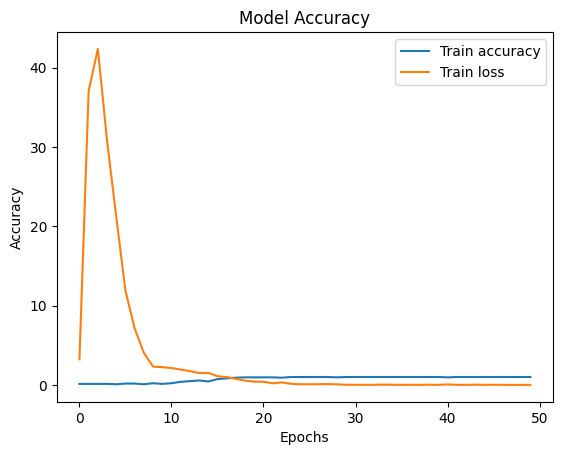

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train accuracy','Train loss'])
plt.show

In [ ]:
# Lưu lại dữ liệu sau khi train
model.save("10monan.h5")

In [ ]:
#Load mô hình đã lưu
model_CNN=load_model('10monan.h5')

In [ ]:
#Testing
test="/content/drive/MyDrive/ANHBTAI/10MONANVIETNAM/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  
  result = int(np.argmax(model_CNN.predict(img),axis =1))

  class_name=['cha gio','banh chung','banh mi','banh trang nuong','banh xeo','bun bo','bun dau mam tom','goi cuon','nem chua','banh cam']
  
  print(class_name[result])
  plt.show()